### Quantum noise

In [38]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2, Session

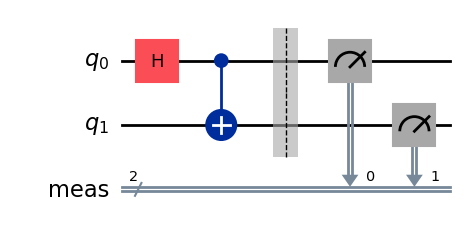

In [39]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw("mpl", style="iqp")

In [40]:
service = QiskitRuntimeService()

def get_real_backend(min_qubits: int = 2):
    backend = service.least_busy(
        operational=True,
        simulator=False,
        min_num_qubits=min_qubits
    )
    return backend

try:
    backend = get_real_backend()
    backend_name = backend.name
    print(f"[INFO] Real backend selected: {backend_name}  (pending jobs = {backend.status().pending_jobs})")

except Exception as e:
    raise RuntimeError(f"[ERROR] Failed to obtain a real quantum backend: {e}")


/tmp/ipykernel_740/3843614506.py:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


[INFO] Real backend selected: ibm_brisbane  (pending jobs = 5)


In [41]:
compiled = transpile(qc, backend, optimization_level=1)
with Session(backend=backend) as session:
    sampler = SamplerV2(session)
    job     = sampler.run([compiled], shots=500)
    result  = job.result()
counts = result[0].data.meas.get_counts()
print(f"Counts on {backend.name}: {counts}")


/usr/local/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Counts on ibm_brisbane: {'01': 19, '00': 243, '10': 6, '11': 232}


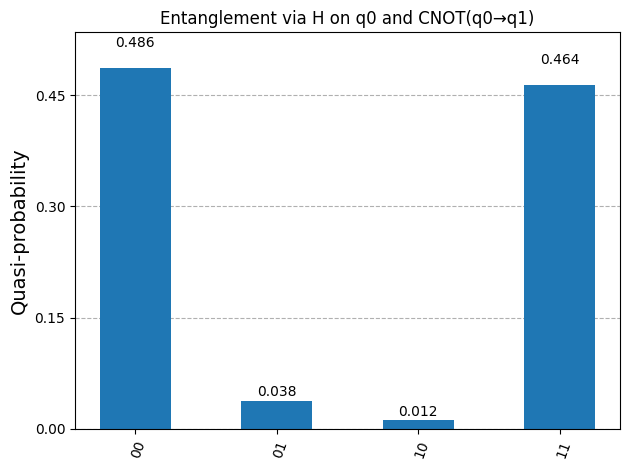

In [42]:
shots = sum(counts.values())
probs = {bit: round(val / shots, 3) for bit, val in counts.items()}
plot_histogram(probs, title="Entanglement via H on q0 and CNOT(q0→q1)")